In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas

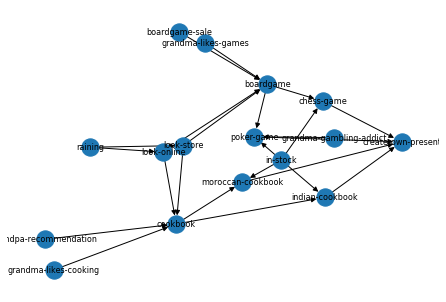

In [2]:
present_network = BayesNet()
present_network.load_from_bifxml('testing/Christmas-present-problem.BIFXML')
present_network.draw_structure(node_size=300, font_size=8)
reasoner = BNReasoner(present_network)

In [3]:
# calculate prior and posterior marginal
priori_result = reasoner.prior_marginal(['moroccan-cookbook', 'grandpa-recommendation'])
priori_result2 = reasoner.prior_marginal(['create-own-present', 'look-online'])
post_result = reasoner.posterior_marginal(['poker-game'], [('grandma-gambling-addict', True)])
post_result2 = reasoner.posterior_marginal(['indian-cookbook'], [('in-stock', False)])
print(priori_result)
print(priori_result2)
print(post_result)
print(post_result2)

  moroccan-cookbook grandpa-recommendation         p
0             False                  False  0.630654
1             False                   True  0.232691
2              True                  False  0.069346
3              True                   True  0.067309
  look-online create-own-present         p
0       False              False  0.159677
1       False               True  0.400323
2        True              False  0.230524
3        True               True  0.209476
  poker-game         p
0      False  0.984605
1       True  0.015395
  indian-cookbook    p
0           False  1.0
1            True  0.0


In [6]:
# calculate a MAP instance for Christmas present network
map_result = reasoner.map_instance(['boardgame'], [('grandma-likes-games', True)])
map_result2 = reasoner.map_instance(['indian-cookbook', 'create-own-present'], [('grandma-likes-games', True), ('grandma-gambling-addict', True)])
map_result3 = reasoner.map_instance(['create-own-present'], [('grandma-likes-games', False), ('grandma-likes-cooking', False), ('grandpa-recommendation', False)])
display(map_result)
display(map_result2)
display(map_result3)

,boardgame,p
1,True,0.571624


,indian-cookbook,create-own-present,p
1,False,True,0.609095


,create-own-present,p
1,True,0.923802


In [8]:
# retrieve all cpts
pandas.set_option('display.max_rows', 20)
for variable in present_network.get_all_variables():
    display(present_network.get_cpt(variable))

SyntaxError: invalid syntax (2173475895.py, line 3)

In [ ]:
# calculate a MPE instance for Christmas present network
MPE_result = reasoner.mpe([('grandma-likes-games', True)])
display(MPE_result)